<a href="https://colab.research.google.com/github/JUANESPG29/Estructuras-Computacionales/blob/main/Serie_de_fourier_Pulso_Rectangular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
from scipy.signal import square, sawtooth
import numpy as np
from ipywidgets import interact  # https://ipywidgets.readthedocs.io/en/latest/user_install.html

# Fourier series

Text(0, 0.5, 'x(t)')

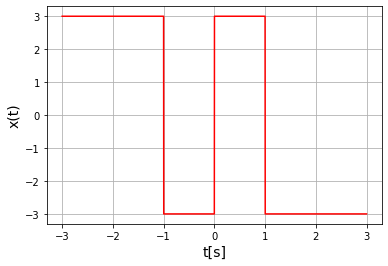

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

A = 3
T = 6
Fs = 1000 # 500 muestras por segundo Ajustar según señal estudiada
Nm = T*Fs #numero de muestras requeridas
tv = np.linspace(-T/2,T/2,Nm)

xo = np.concatenate((A*np.ones(int(2000)), -A*np.ones(int(1000)),A*np.ones(int(1000)),-A*np.ones(int(2000))), axis=0)

plt.plot(tv,xo,'r')
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)

## Input signal

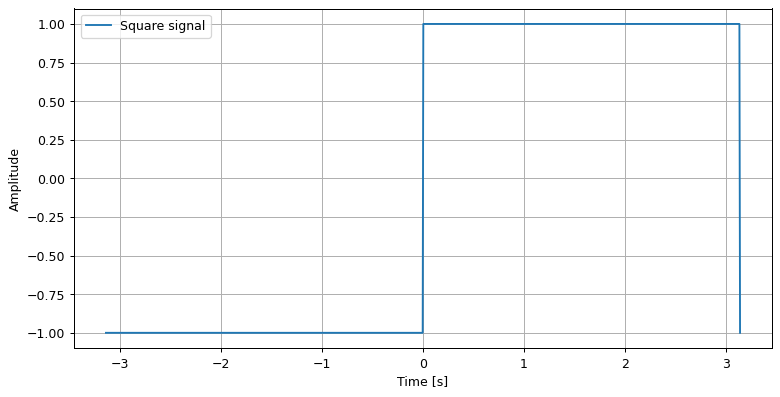

In [ ]:
t = np.linspace(-np.pi, np.pi, 1000)  # time
signal = square(t)  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html

plt.figure(figsize=(10, 5), dpi=90)
plt.plot(t, signal, label='Square signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

$$
f(y)\sim \color{blue}{\frac{a_{0}}{2}}+\sum_{n=1}^{\infty}\left[\color{green}{a_{n}cos\left(\frac{2n\pi}{T}t\right)}+\color{red}{b_{n}sin\left(\frac{2n\pi}{T}t\right)}\right]
$$

$T$ is the period of the signal, our signal is defined like a single period.

In [ ]:
T = t[-1] - t[0]

$$
\color{blue}{a_{0}=\frac{2}{T}\int_{-T/2}^{T/2}f(t)\partial t}
$$

In [ ]:
a0 = (2/T) * np.trapz(signal, t)

$$
\color{green}{a_{n}=\frac{2}{T}\int_{-T/2}^{T/2}f(t)cos\left(\frac{2n\pi}{T}t\right)\partial t}
$$

In [ ]:
# def an(n):
#     return (2/T) * cumtrapz(signal*np.cos(2*n*np.pi*t/T), t, initial=0)
an = lambda n:(2/T) * np.trapz(signal*np.cos(2*n*np.pi*t/T), t)

$$
\color{red}{b_{n}=\frac{2}{T}\int_{-T/2}^{T/2}f(t)sin\left(\frac{2n\pi}{T}t\right)\partial t}
$$

In [ ]:
bn = lambda n:(2/T) * np.trapz(signal*np.sin(2*n*np.pi*t/T), t)

Instead of rewrite the full plot code, we write a function that can be reused: 

In [ ]:
def show(signal1, signal2, N=None):
    plt.figure(figsize=(10, 5), dpi=90)

    plt.plot(t, signal1, '--', label='Square signal')
    plt.plot(t, signal2, label=f'Fourier series (N={N})')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

Using *for* cycles for iterate over `N`:

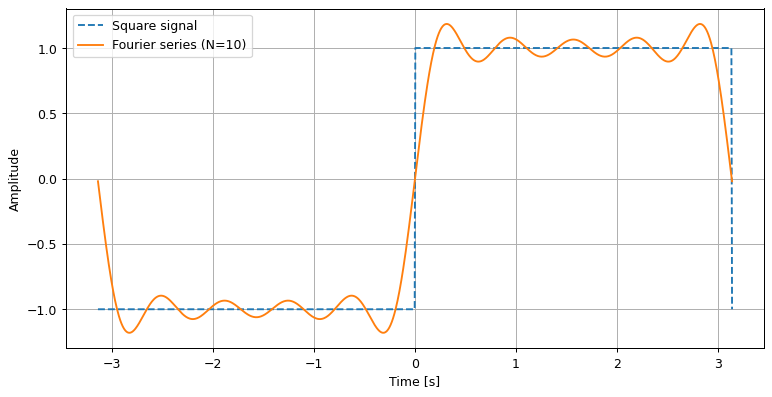

In [ ]:
N = 10
p = []
for n in range(1, N+1):
    p.append(an(n)*np.cos(2*n*np.pi*t/T) + bn(n)*np.sin(2*n*np.pi*t/T))
p = np.array(p)
signal_ = p.sum(axis=0)

show(signal, signal_, N)

Using [list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions):

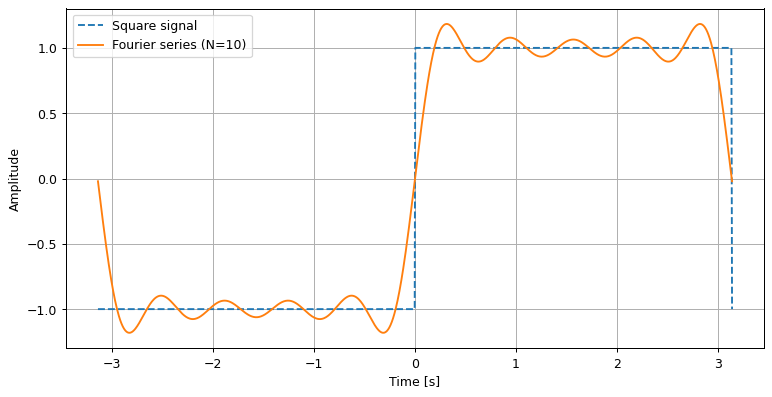

In [ ]:
signal_ = lambda N:(a0/2)+np.array([an(n)*np.cos(2*n*np.pi*t/T) + bn(n)*np.sin(2*n*np.pi*t/T) for n in range(1, N+1)]).sum(axis=0)

N = 10
show(signal, signal_(N), N)

## Interactive widgets

In [ ]:
@interact(N=(1, 100, 1))
def fourier_series_interative(N=10):
    show(signal, signal_(N), N)

interactive(children=(IntSlider(value=10, description='N', min=1), Output()), _dom_classes=('widget-interact',…

# Components analysis

In this part, we will plot `a0`, `an`, and `bn`  by separate and see the influence of each one the composition of the final series.

In [ ]:
@interact(offset=(-1, 1, 0.01), t0=(0, np.pi/2, 0.01), N=(1, 100, 1))
def interactive_components(offset=0, t0=0, N=10):

    t = np.linspace(-np.pi, np.pi, 1000)  # time
    signal = offset + square(t-t0+np.pi/2)  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html
    
    T = t[-1] - t[0]
    a0 = (2/T) * np.trapz(signal, t)
    an = lambda n:(2/T) * np.trapz(signal*np.cos(2*n*np.pi*t/T), t)
    bn = lambda n:(2/T) * np.trapz(signal*np.sin(2*n*np.pi*t/T), t)
    serie = (a0/2)+np.array([an(n)*np.cos(2*n*np.pi*t/T) + bn(n)*np.sin(2*n*np.pi*t/T) for n in range(1, N+1)]).sum(axis=0)

    serie_an = np.array([an(n)*np.cos(2*n*np.pi*t/T) for n in range(1, N+1)]).sum(axis=0)
    serie_bn = np.array([bn(n)*np.sin(2*n*np.pi*t/T) for n in range(1, N+1)]).sum(axis=0)

    plt.figure(figsize=(30, 7), dpi=90)

    plt.subplot(131)
    plt.plot(t, signal, label='Square signal')
    plt.legend()
    plt.grid(True)
    plt.ylabel('Amplitude')
    plt.xlabel('Time [s]')
    plt.ylim(-2, 2)

    plt.subplot(132)
    plt.plot(t, [a0/2]*len(t), label=f'$a_0$', color='b')
    plt.plot(t, serie_an, label=f'$a_n$', color='g')
    plt.plot(t, serie_bn, label=f'$b_n$', color='r')
    plt.legend()
    plt.grid(True)
    plt.ylabel('Amplitude')
    plt.xlabel('Time [s]')
    plt.ylim(-2, 2)

    plt.subplot(133)
    plt.plot(t, serie, color='C1', label='Fourier reconstruction')
    plt.legend()
    plt.grid(True)
    plt.ylabel('Amplitude')
    plt.xlabel('Time [s]')
    plt.ylim(-2, 2)

interactive(children=(FloatSlider(value=0.0, description='offset', max=1.0, min=-1.0, step=0.01), FloatSlider(…

**What we see here?**

* When the signal is **EVEN** $\color{red}{b_n}$ is `0`
* When the signal is ***ODD*** $\color{green}{a_n}$ is `0`
* The "DC level" is codified in $\color{blue}{a_0}$

# Single function definition

We will write a script to compress all definition until now, our new function will receive a `signal` (anyone) and an `N` and will return their *Fourier series*.

In [ ]:
def fourier_series(signal, t, N):
    
    T = t[-1] - t[0]
    a0 = (2/T) * np.trapz(signal, t)
    an = lambda n:(2/T) * np.trapz(signal*np.cos(2*n*np.pi*t/T), t)
    bn = lambda n:(2/T) * np.trapz(signal*np.sin(2*n*np.pi*t/T), t)
    
    return (a0/2)+np.array([an(n)*np.cos(2*n*np.pi*t/T) + bn(n)*np.sin(2*n*np.pi*t/T) for n in range(1, N+1)]).sum(axis=0)

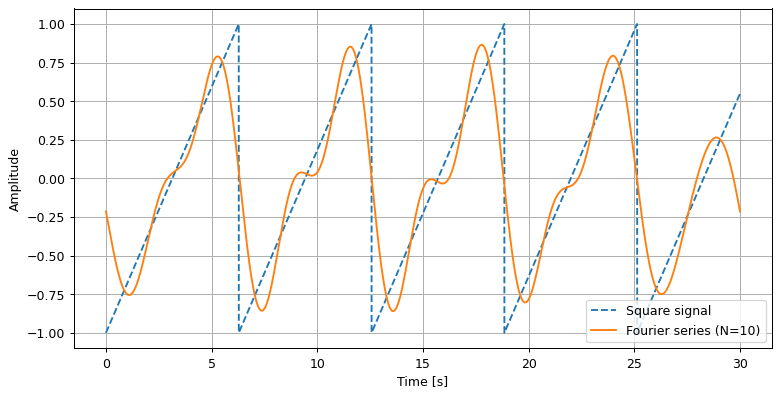

In [ ]:
t = np.linspace(0, 30, 10000)

signal = sawtooth(t)
signal_ = fourier_series(signal, t, 10)

show(signal, signal_, 10)